# Exercise 1:  Multilayer perceptron on MNIST dataset

Build a 2-hidden layer fully connected neural network (a.k.a multilayer perceptron) with TensorFlow to classify digits in the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database).

Adapted from Github User [aymericdamienhtt](https://github.com/aymericdamien) with use governed by the [MIT license](https://opensource.org/licenses/MIT).

## Multilayer Perceptron Overview

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" alt="nn" style="width: 400px;"/>

## MNIST Dataset Overview

This example is using MNIST handwritten digits. The dataset contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 1. For simplicity, each image has been flattened and converted to a 1-D numpy array of 784 features (28*28).

![MNIST Dataset](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)


More info: http://yann.lecun.com/exdb/mnist/

#### Imports

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

#### Import the MNIST data

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


#### What does the data look like?

In [3]:
print("Shape of the training set: ", mnist.train.images.shape)
print("Shape of the test set: ", mnist.test.images.shape)

Shape of the training set:  (55000, 784)
Shape of the test set:  (10000, 784)


The shape of one image is:  (784,)
The maximum pixel intensity in the selected image is:  0.996078
The minimum pixel intensity in the selected image is:  0.0
The one-hot encoded label for this image is: 
[ 0   1   2   3   4   5   6   7   8   9]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]

Made into a 28 x 28 pixel image the image looks like:


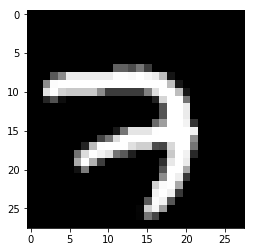

In [4]:
# Look at one image
img = 0 # feel free to modify
print("The shape of one image is: ", mnist.train.images[0].shape)
print("The maximum pixel intensity in the selected image is: ", mnist.train.images[0].max())
print("The minimum pixel intensity in the selected image is: ", mnist.train.images[0].min())
print("The one-hot encoded label for this image is: ")
print("[ 0   1   2   3   4   5   6   7   8   9]")
print(mnist.train.labels[img])
print("\nMade into a 28 x 28 pixel image the image looks like:")
plt.imshow(mnist.train.images[img].reshape(28, 28), cmap = 'gray');

#### Set model and network parameters

In [5]:
# Parameters
learning_rate = 0.1  # tuneable parameter adusting how much weights are updated
num_epochs = 500     # how many times will we pass through the whole dataset during training
batch_size = 128     # how many rows of data during training should a weight update be based on
display_epoch = 100   # after how many epochs would we like to see training results

In [6]:
# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons 
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

#### Define the tensors (constants, placeholders, variables)

In [7]:
# make tensor placeholders for the input and output
# tf Graph input
X = tf.placeholder(tf.float32, shape = (None, num_input))
Y = tf.placeholder(tf.float32, shape = (None, num_classes))

In [8]:
# make variable tensors for the weights and biases
weights = {
    'h1': tf.Variable(tf.random_normal(shape=(num_input, n_hidden_1))),
    'h2': tf.Variable(tf.random_normal(shape=(n_hidden_1, n_hidden_2))),
    'out': tf.Variable(tf.random_normal(shape=(n_hidden_2, num_classes)))
}
biases = {
    'b1': tf.Variable(tf.random_normal(shape=(n_hidden_1,))),
    'b2': tf.Variable(tf.random_normal(shape=(n_hidden_2,))),
    'out': tf.Variable(tf.random_normal(shape=(num_classes,)))
}

#### Define the operations

In [9]:
# define, using operations, the feed-forward calculation of layer values
def feed_forward(x):
    # First hidden fully connected layer
    z1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    a1 = tf.nn.sigmoid(z1)
    # Second hidden fully connected layer
    z2 = tf.add(tf.matmul(a1, weights['h2']), biases['b2'])
    a2 = tf.nn.sigmoid(z2)
    # Output fully connected layer with a neuron for each class
    out = tf.add(tf.matmul(a2, weights['out']), biases['out'])
    return out

In [10]:
# Using the feed_forward operation, get the predictions
logits = feed_forward(X)

Define the loss, see the [softmax](https://en.wikipedia.org/wiki/Softmax_function) and [cross_entropy](https://en.wikipedia.org/wiki/Cross_entropy) definitions.

In [11]:
# Define the loss operation and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))

In [12]:
# Define the optimizer operation
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op = optimizer.minimize(loss_op)

In [13]:
# Define a custom accuracy operation
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

#### Can finally initialize the variables

In [14]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

#### Start a session and train and test
Useful tensorflow fuctions:
make minibatches:

In [15]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for epoch in range(1, num_epochs+1):
        # get a minibatch to train on
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        # Run the training operation to update the weights, use a feed_dict to use batch_x and batch_y
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        
        # display output if desired
        if epoch % display_epoch == 0 or epoch == 1:
            # Calculate batch loss and accuracy
            # You can run multiple operations using a list
            # as above, use a feed dictionary for batch_x, batch_y
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y})
            print("Epoch " + str(epoch) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))

    print("Optimization Finished!")

    # Run the accuracy operations for the MNIST test images
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: mnist.test.images,
                                      Y: mnist.test.labels}))

Epoch 1, Minibatch Loss= 11.5589, Training Accuracy= 0.102
Epoch 100, Minibatch Loss= 2.1384, Training Accuracy= 0.555
Epoch 200, Minibatch Loss= 1.2614, Training Accuracy= 0.656
Epoch 300, Minibatch Loss= 0.8842, Training Accuracy= 0.734
Epoch 400, Minibatch Loss= 1.3279, Training Accuracy= 0.680
Epoch 500, Minibatch Loss= 0.9876, Training Accuracy= 0.773
Optimization Finished!
Testing Accuracy: 0.7549
